# 30-Day Rolling Dispersion on Chinese A-shares

In [7]:
i:("S", 38#"F";enlist",")0:`:close.csv
i:.Q.id cols[i] xcol i
delete x1 from `i
coll: cols[i] except `x
w:{sum i[x]} each coll
i:i upsert `total,w
f3:{(x-y)%y}
f4:{[x]z:1 38 sublist value i[x]; f3':[z]}
h:f4 each til 4760
mean:h[4759]


`i


In [8]:
t:("S", 101#"F";enlist",")0:`:mkt_cap.csv
colsTOO:cols[t] except `x
t:.Q.id cols[t] xcol t
delete x1 from `t
colsTo: cols[t] except `x
s:{sum t[x]} each colsTo
t:t upsert `total,s
s:colsTOO!s
a: value t[4759]
a:1 102 sublist a
b: 4760 101#a
f2:{t[x;y]%b}
e: f2 [til 4760; colsTo]

`t


In [3]:
i:("S", 101#"F";enlist",")0:`:close.csv
i:.Q.id cols[i] xcol i
delete x1 from `i
coll: cols[i] except `x
w:{sum i[x]} each coll
i:i upsert `total,w
f3:{(x-y)%y}
f4:{[x]z:1 102 sublist value i[x]; f3':[z]}
h:f4 each til 4760
mean:h[4759]
f6:{[x;y] (x -\: y)*(x -\: y)}
k:f6[h;mean]
m:e*k
f7:{sum m[;x]}
dispersion:colsTOO!f7 each til 101
swin:{[f;w;s] f each { 1_x,y }\[w#0;s]}
dispersion:swin[avg; 21; dispersion]
dispersion:21 102 sublist dispersion

`i


In [4]:
.p.set[`x;dispersion]
.p.set[`s;s]
p)print(type(x))

<class 'dict'>


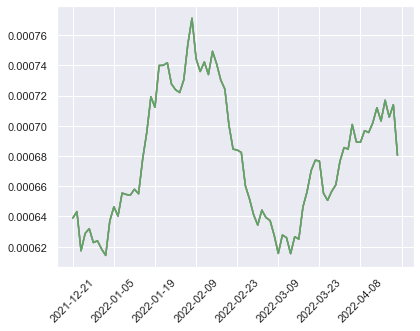

<Figure size 7200x7200 with 0 Axes>

In [6]:
p)import seaborn as sns
p)import numpy as np
p)import matplotlib.pyplot as plt
p)import matplotlib.ticker as ticker
p)sns.set()
p)ax=sns.lineplot(data=x)
p)plt.xticks(np.arange(0, len(x.keys())+1, 10))
p)plt.xticks(rotation=45)
p)plt.figure(figsize=(100,100))
p)plt.show()